<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/RfHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split

# Importing dataset
df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
#Check missing values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
bedroom_mean = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(bedroom_mean, inplace=True)

In [15]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [16]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
#(Optinal) Delete Island as we have few value 
df = df[df.ocean_proximity != 'ISLAND']
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

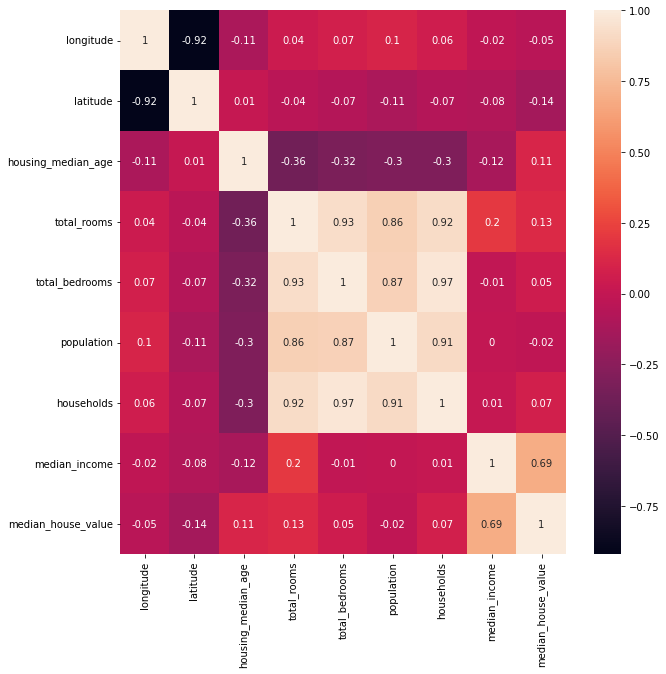

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr().round(2),annot = True,ax=ax)

In [36]:
X=df.drop(columns=['median_house_value'])
X
X = pd.get_dummies(X, drop_first=True)
Y=df['median_house_value']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [37]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (16508, 11)
Shape of X_test=> (4127, 11)
Shape of Y_train=> (16508,)
Shape of Y_test=> (4127,)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [55]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

 

In [58]:
print('Train Data')
y_pred = lr.predict(X_train)
evalmetric(Y_train,y_pred)
print('Test Data')
y_pred2 = lr.predict(X_test)
evalmetric(Y_test,y_pred2)

Train Data
MSE: 4698549395.241975
RMSE: 68545.96556502779
MAE: 49764.61529015465
MAPE: 28.721474754814206
R-Squared: 0.6477004388682566
Test Data
MSE: 4823713194.293876
RMSE: 69452.95669943704
MAE: 49847.28443726601
MAPE: 28.39285501499358
R-Squared: 0.6346492617918907


In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
## Predicting for training data
print('Train Data')
y_pred = dtr.predict(X_train)
evalmetric(Y_train,y_pred)
print('Test Data')
y_pred2 = dtr.predict(X_test)
evalmetric(Y_test,y_pred2)

Train Data
MSE: 0.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0
R-Squared: 1.0
Test Data
MSE: 4603594091.052339
RMSE: 67849.79064855204
MAE: 42537.11485340441
MAPE: 22.375515698840136
R-Squared: 0.6513212059195256


In [61]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
## Predicting for training data
print('Train Data')
y_pred = rfr.predict(X_train)
evalmetric(Y_train,y_pred)
print('Test Data')
y_pred2 = rfr.predict(X_test)
evalmetric(Y_test,y_pred2)

Train Data
MSE: 330462913.6031526
RMSE: 18178.63893703686
MAE: 11751.395270172035
MAPE: 6.563093457851019
R-Squared: 0.9752217270397107
Test Data
MSE: 2401296020.2443223
RMSE: 49003.02052164052
MAE: 31406.006803973894
MAPE: 17.009753228633663
R-Squared: 0.8181244949035813
